Ладно, начнём сначала. Тут будет что-то написано по оглавлению

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#это мне всё, конечно же, понадобится

In [11]:
X_train = pd.read_parquet('/kaggle/input/input-datasets/X_train.parquet', engine = 'auto')

In [12]:
for col in X_train.columns:
    while "  " in col:
        X_train = X_train.rename(columns={col:col.replace("  ", " ")})
    if ".ПРОДОЛЬНАЯ" in col:
        X_train = X_train.rename(columns={col:col.replace(".ПРОДОЛЬНАЯ", ". ПРОДОЛЬНАЯ")})
    if "ТОК РОТОРА2" in col:
        X_train = X_train.rename(columns={col:col.replace("ТОК РОТОРА2", "ТОК РОТОРА 2")})
    if "." == col[-1]:
        X_train = X_train.rename(columns={col:col.strip(".")})
X_train = X_train.dropna()

In [13]:
for col in X_train.columns:
    print(col)

ЭКСГАУСТЕР 4. ТОК РОТОРА 1
ЭКСГАУСТЕР 4. ТОК РОТОРА 2
ЭКСГАУСТЕР 4. ТОК СТАТОРА
ЭКСГАУСТЕР 4. ДАВЛЕНИЕ МАСЛА В СИСТЕМЕ
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 2
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 4
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В СИСТЕМЕ
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В МАСЛОБЛОКЕ
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 1
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 2
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 3
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 3. ПРОДОЛЬНАЯ
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 4
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 4. ПРОДОЛЬНАЯ
ЭКСГАУСТЕР 5. ТОК РОТОРА 1
ЭКСГАУСТЕР 5. ТОК РОТОРА 2
ЭКСГАУСТЕР 5. ТОК СТАТОРА
ЭКСГАУСТЕР 5. ДАВЛЕНИЕ МАСЛА В СИСТЕМЕ
ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1
ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 2
ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3
ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 4
ЭКСГАУСТЕР 5. ТЕМПЕРАТУРА МАСЛА В СИСТЕМЕ
ЭКСГАУСТЕР 5. ТЕМПЕРА

In [14]:
dict1 = dict()
dict2 = dict()
columns = []
index = []
for col in X_train.columns:
    tokenized = col.split(".")
    columns.append(tokenized[0])
    second_token = ""
    for token in tokenized[1:]:
        second_token += token.strip(" ")+". "
    second_token = second_token.strip(". ").strip(" ")
    index.append(second_token)
index = set(index)
matrix = pd.DataFrame(index)
matrix = matrix.rename(columns={0:"index"})
for col in columns:
    matrix[col] = pd.Series(np.array([0]*len(index)))
matrix = matrix.set_index("index")
for col in X_train.columns:
    tokenized = col.split(". ")
    columns.append(tokenized[0])
    second_token = ""
    for token in tokenized[1:]:
        second_token += token+". "
    second_token = second_token.strip(". ").strip(" ")
    matrix.loc[second_token,tokenized[0]] = 1
matrix

,ЭКСГАУСТЕР 4,ЭКСГАУСТЕР 5,ЭКСГАУСТЕР 6,ЭКСГАУСТЕР 7,ЭКСГАУСТЕР 8,ЭКСГАУСТЕР 9
index,,,,,,
ТЕМПЕРАТУРА МАСЛА В СИСТЕМЕ,1,1,1,1,1,1
ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1,1,1,1,1,1,1
ТОК РОТОРА 2,1,1,1,1,1,1
ВИБРАЦИЯ НА ОПОРЕ 4. ПРОДОЛЬНАЯ,1,1,1,1,1,1
ТЕМПЕРАТУРА МАСЛА В МАСЛОБЛОКЕ,1,1,1,1,1,1
ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3,1,1,1,1,1,1
ВИБРАЦИЯ НА ОПОРЕ 1,1,1,1,1,1,1
ВИБРАЦИЯ НА ОПОРЕ 3,1,1,1,1,1,1
ТОК РОТОРА 1,1,1,1,1,1,1


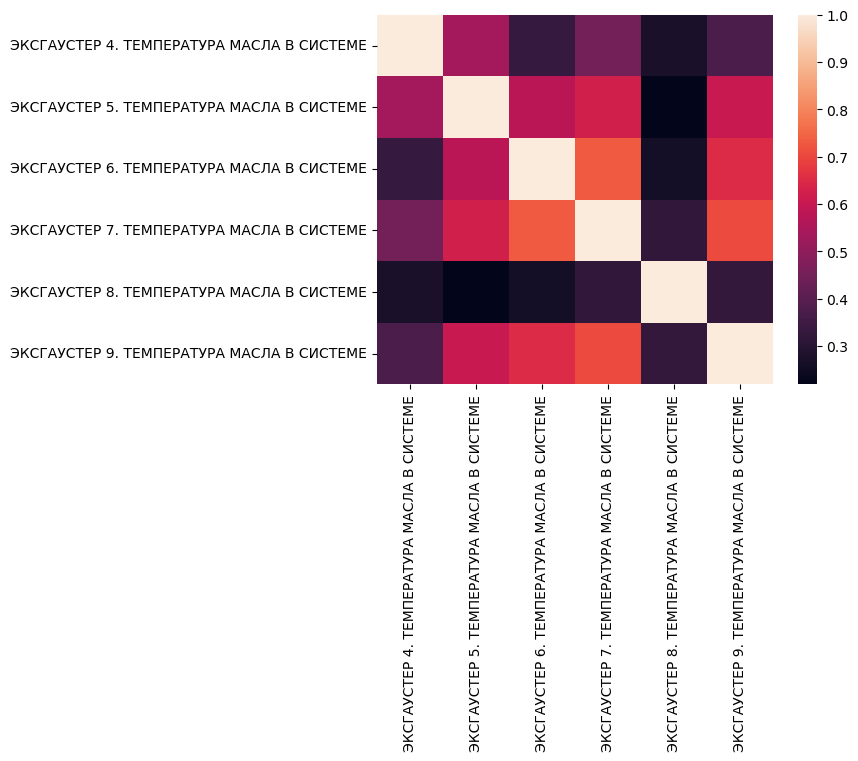

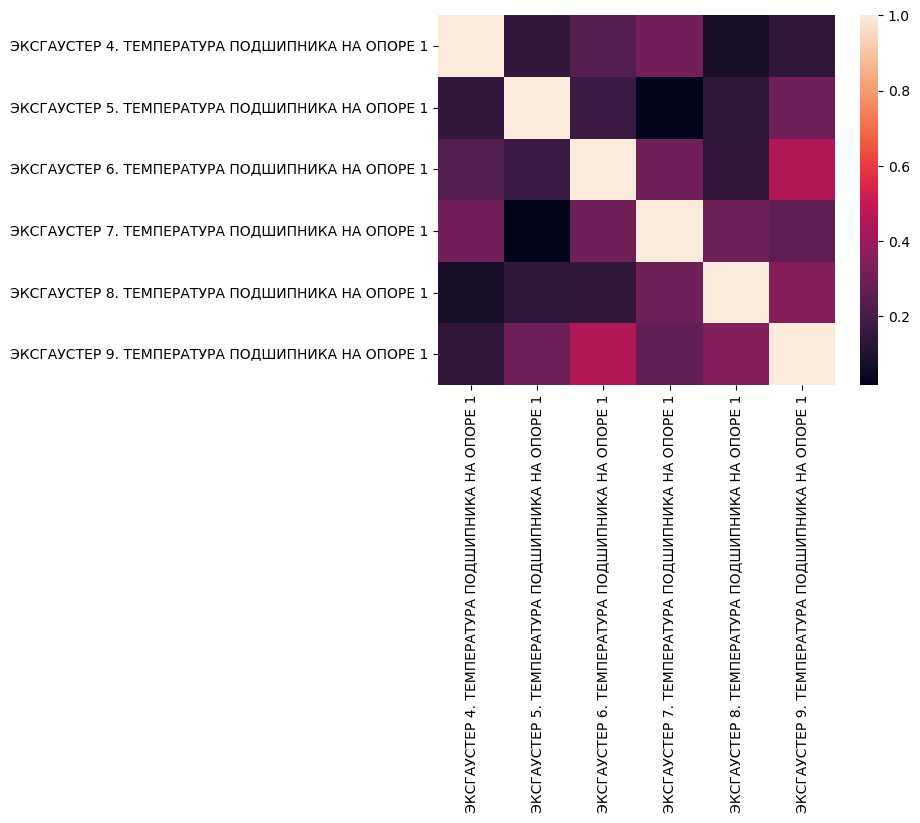

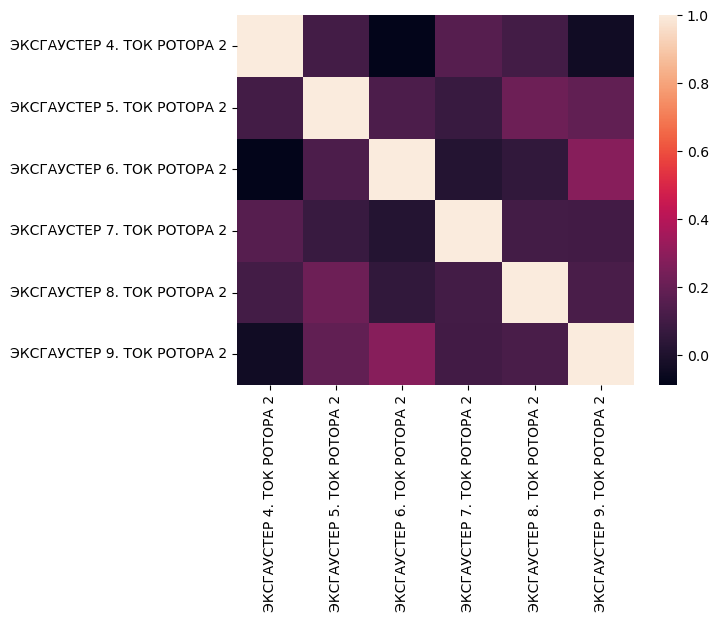

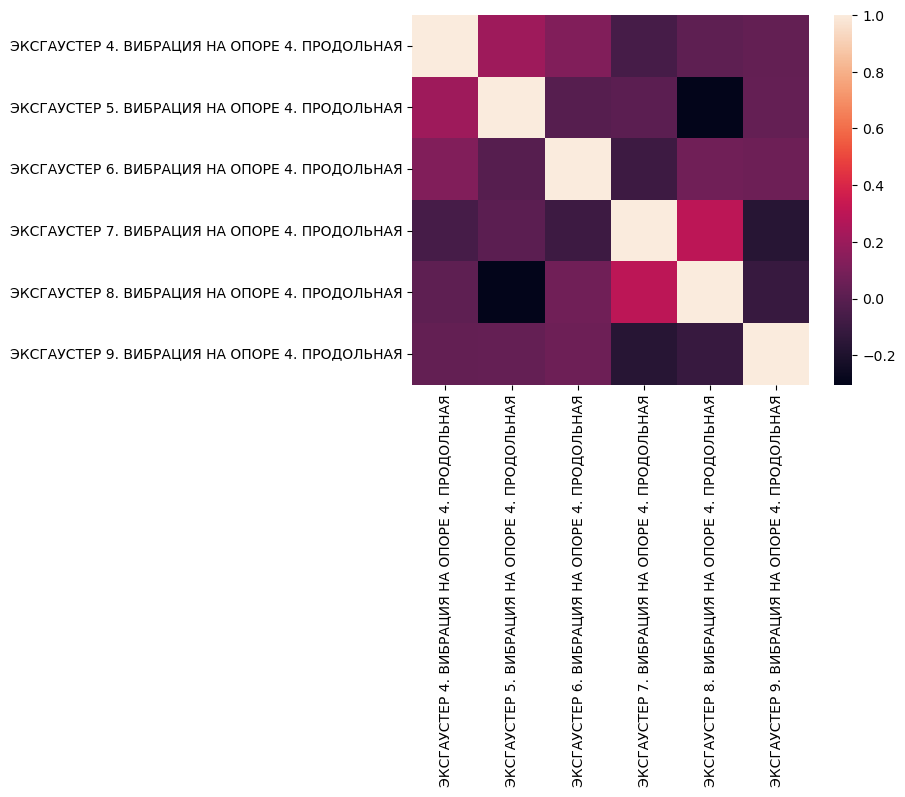

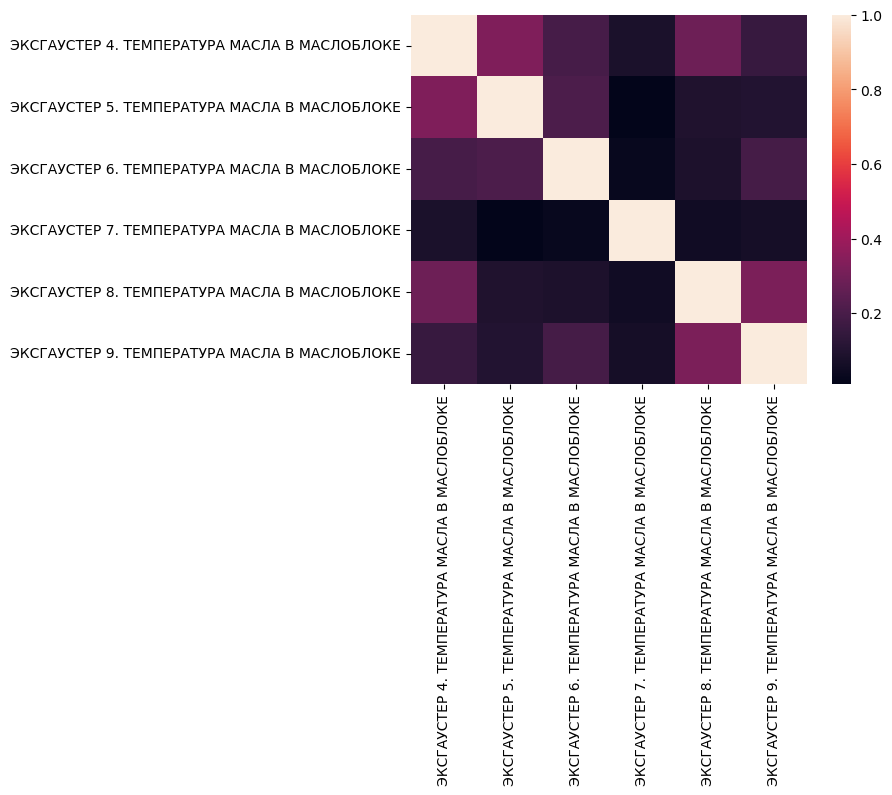

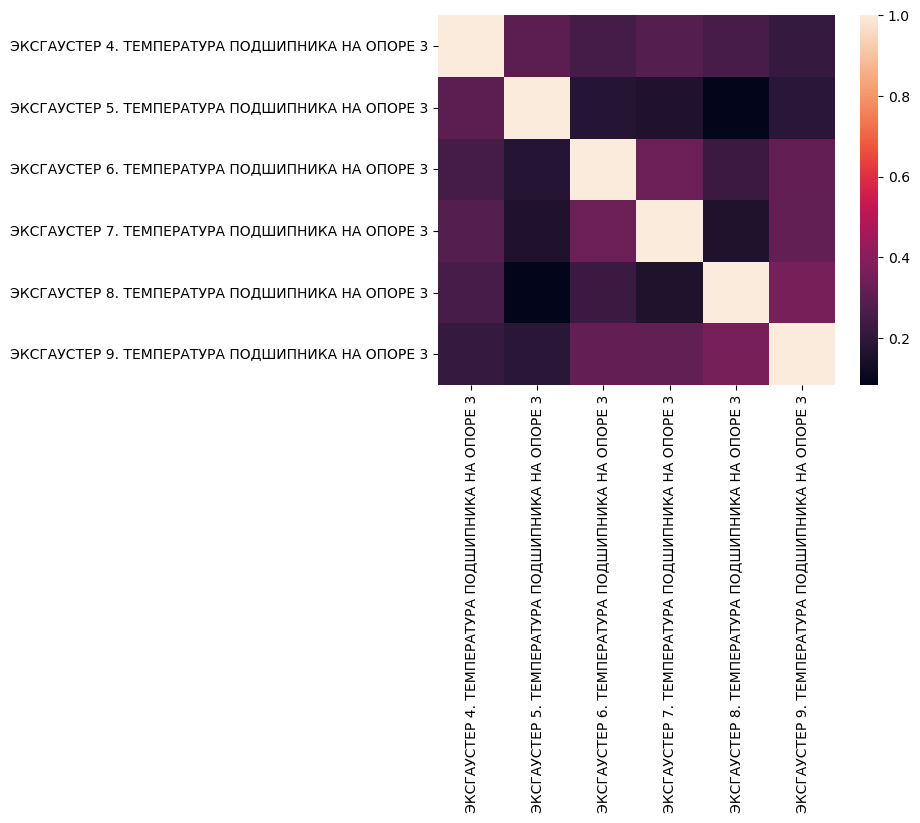

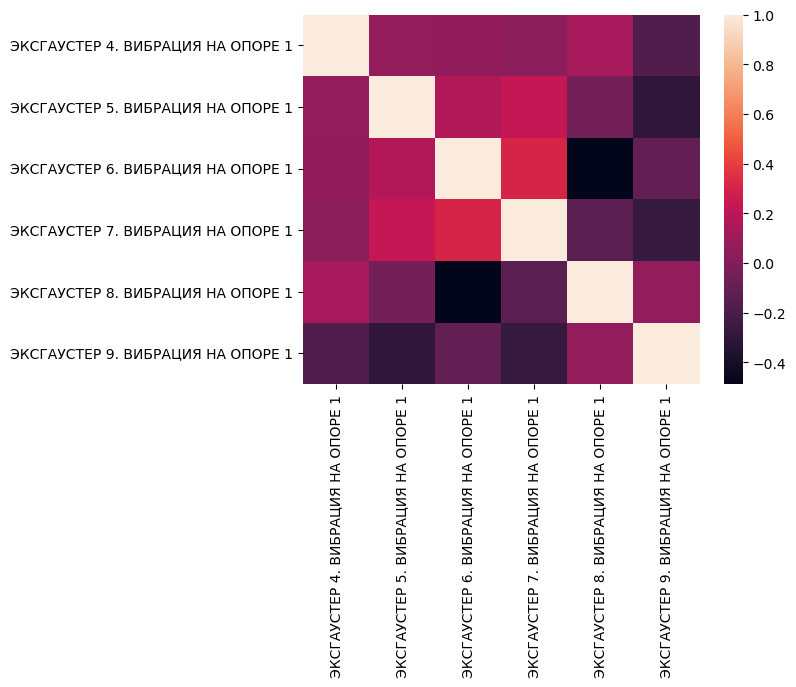

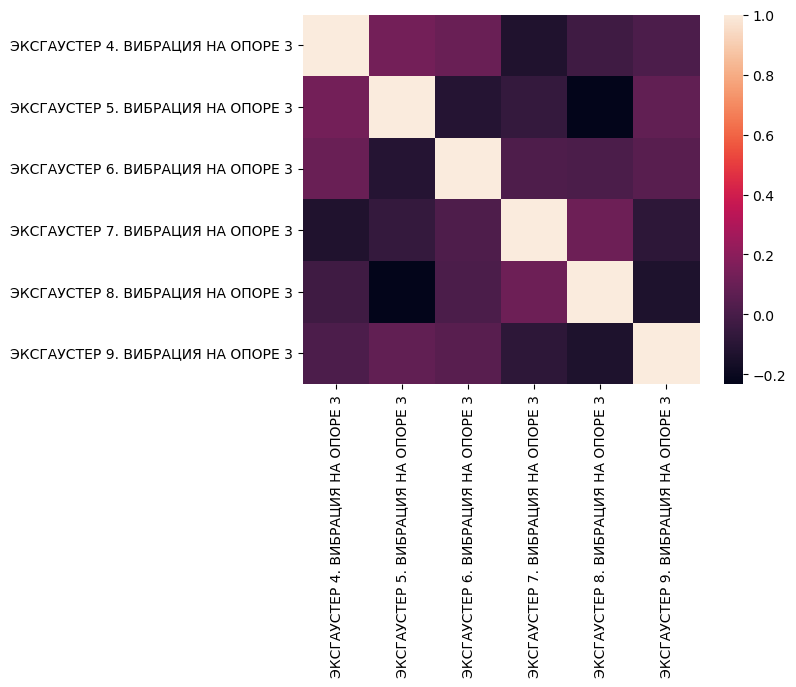

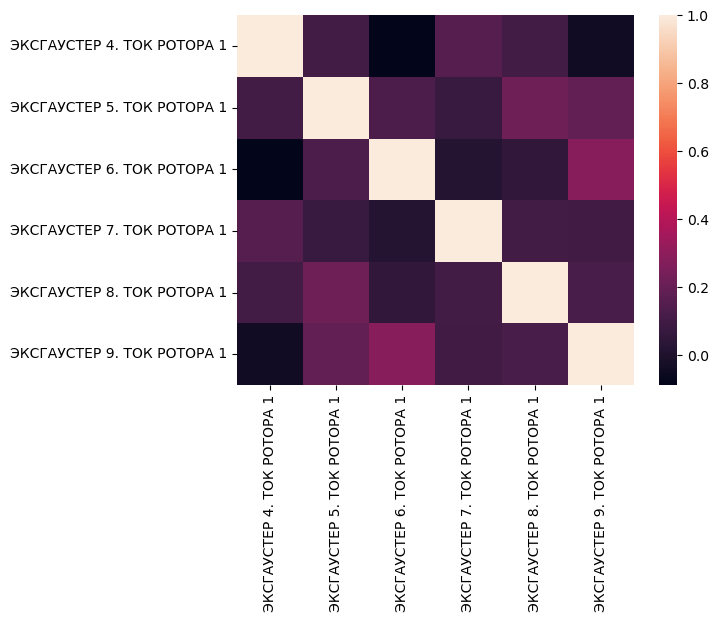

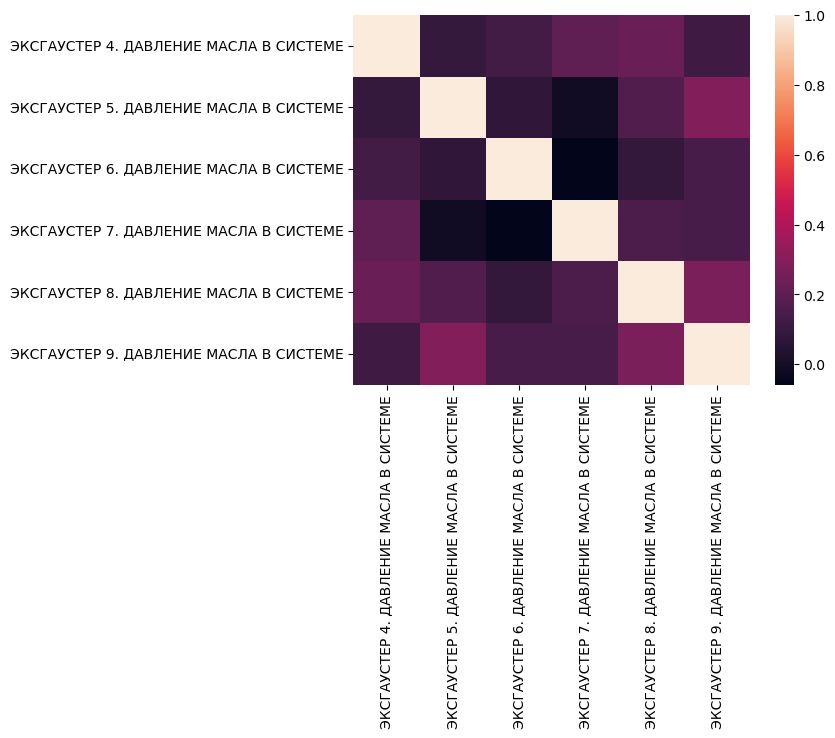

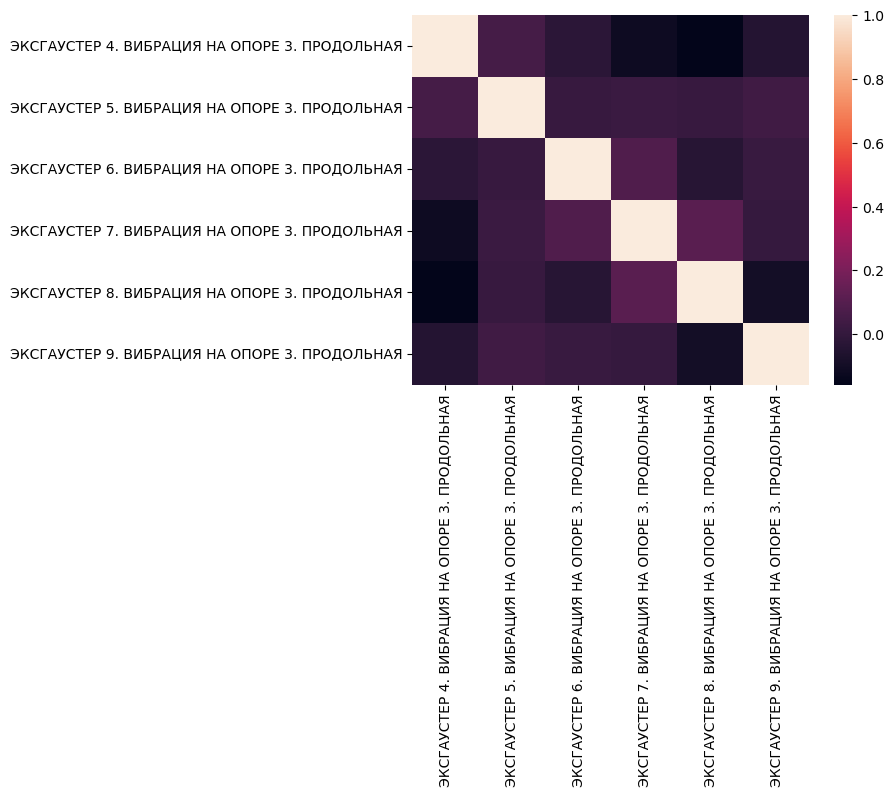

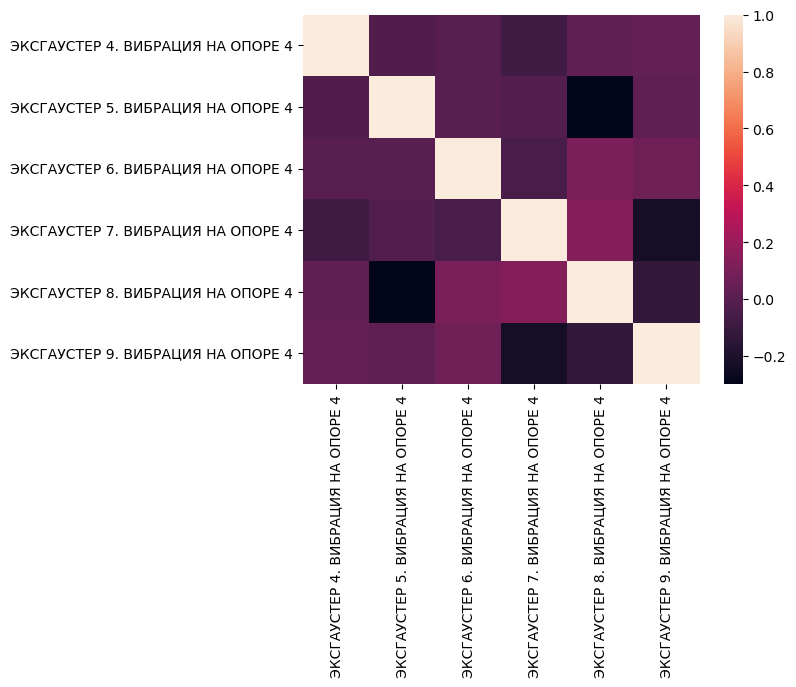

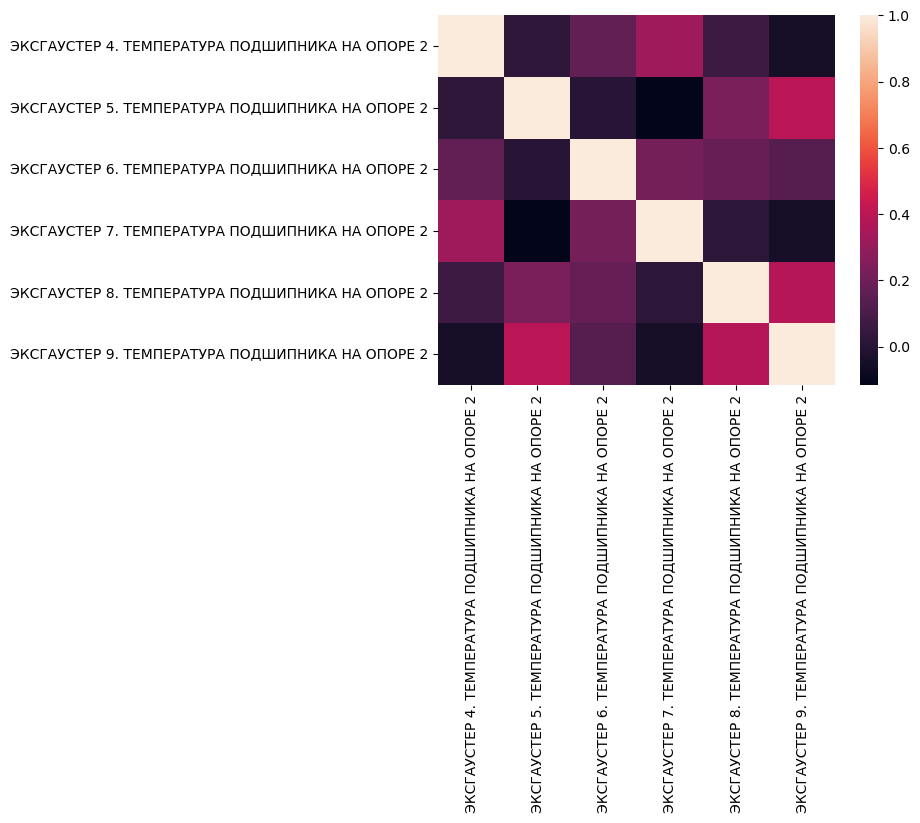

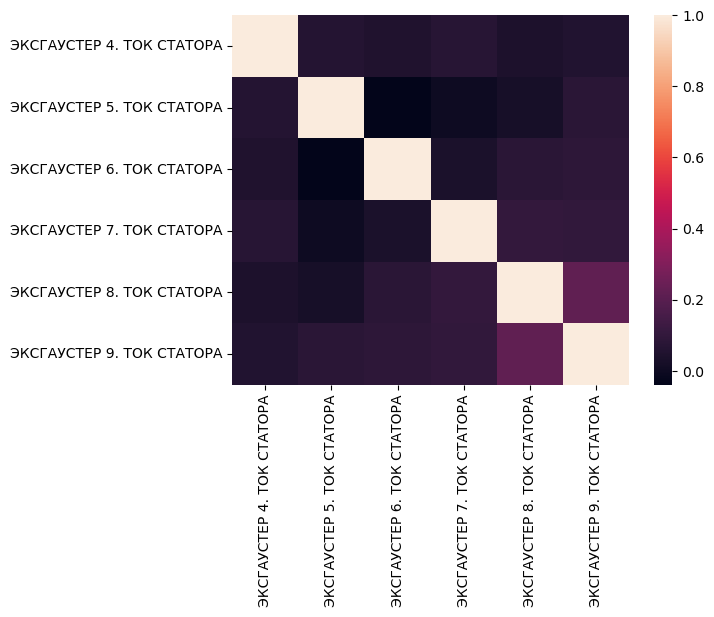

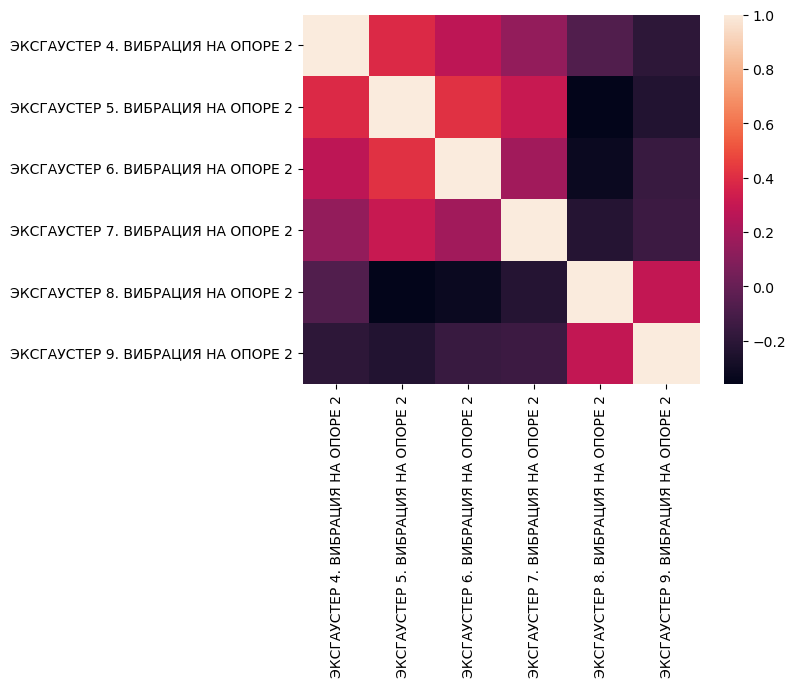

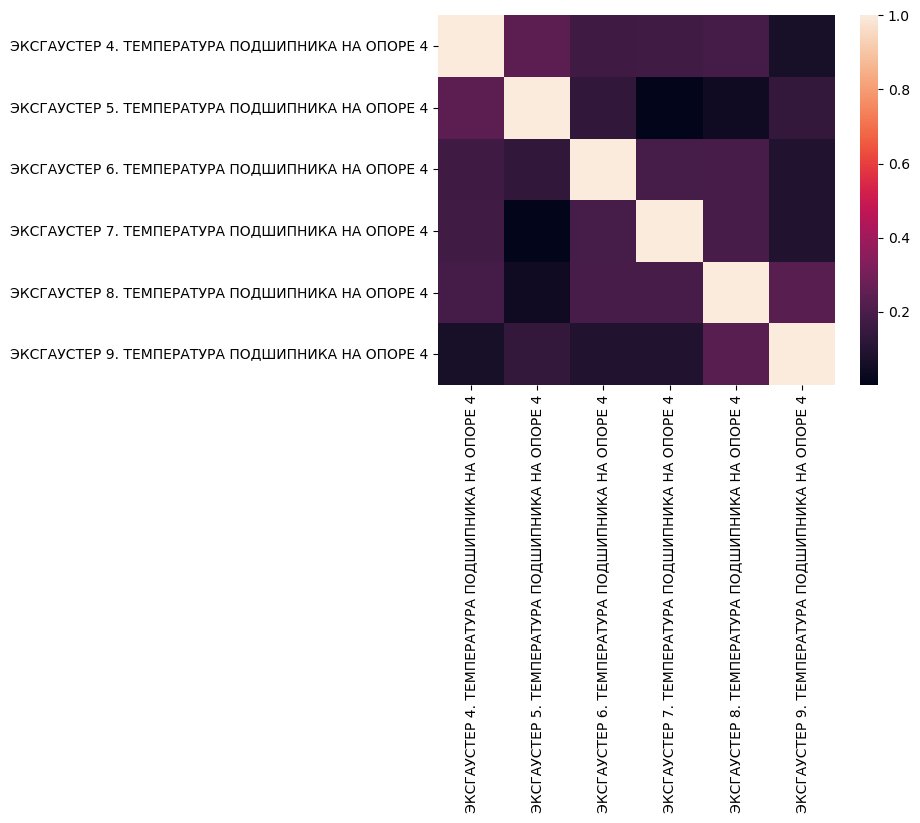

In [15]:
for line in matrix.index.values:
    local_columns = []
    for col in matrix.columns:
        local_columns.append(col+". "+line)
    #X_train[local_columns].plot()
    #plt.show()
    X_train[local_columns].to_csv(line+".csv")
    sns.heatmap(X_train[local_columns].corr())
    plt.show()

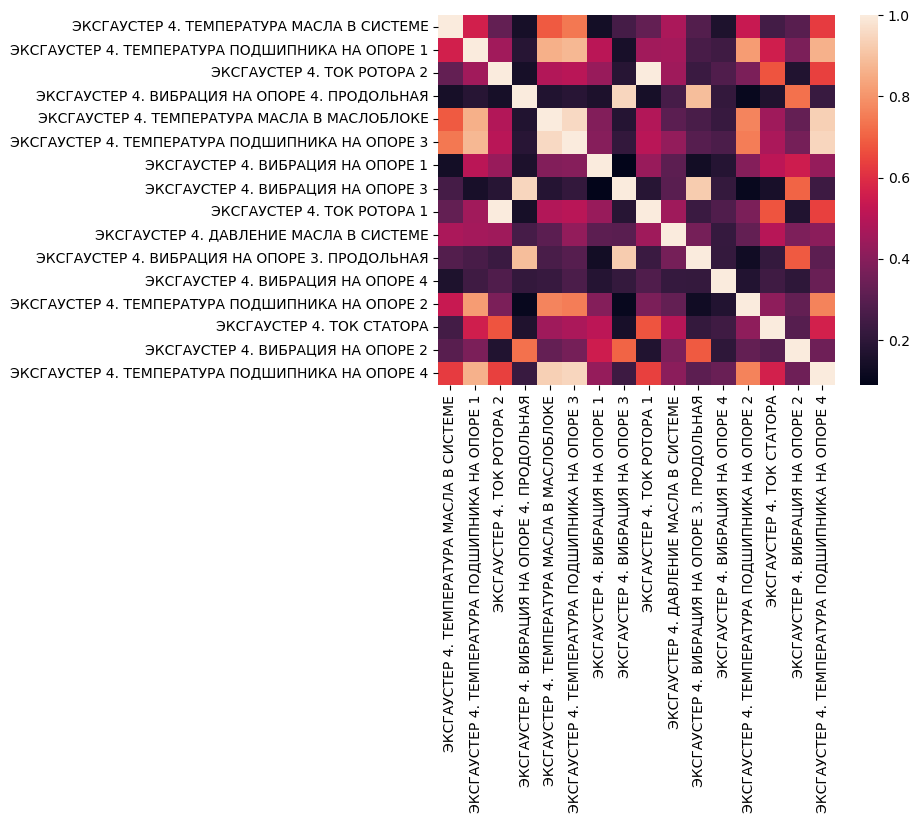

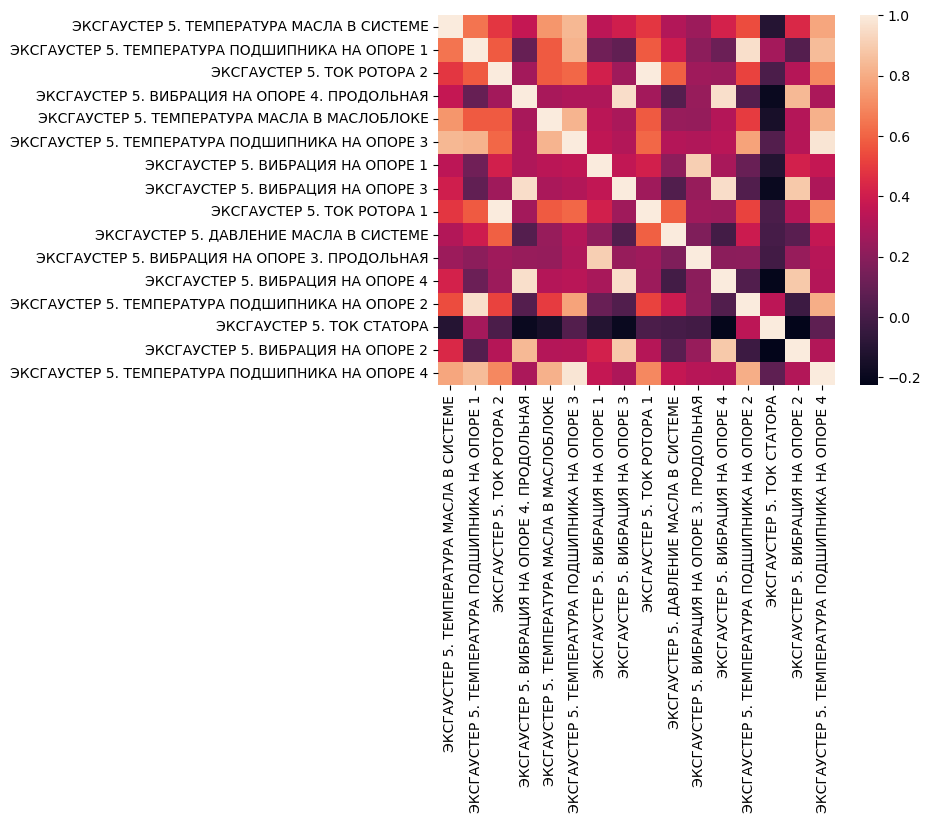

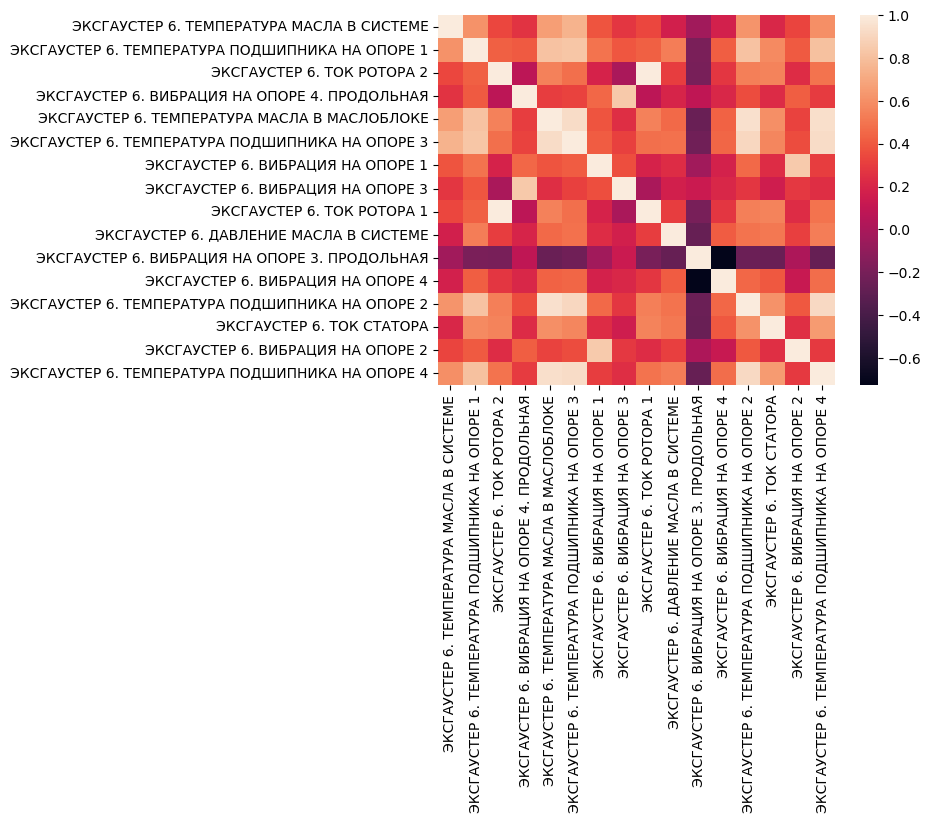

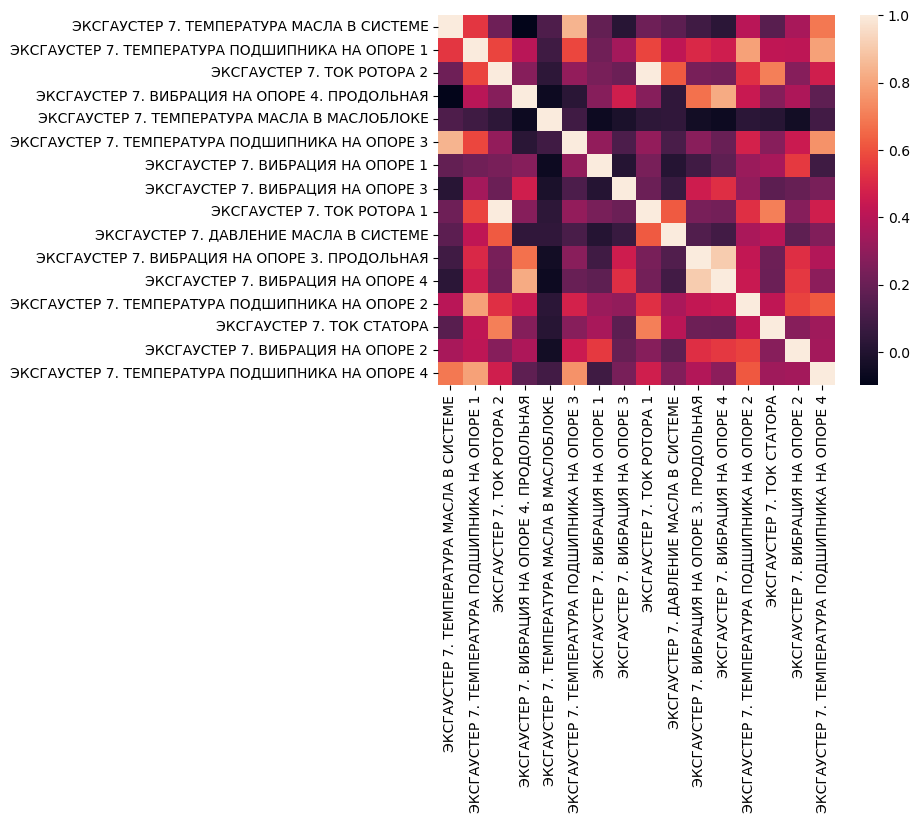

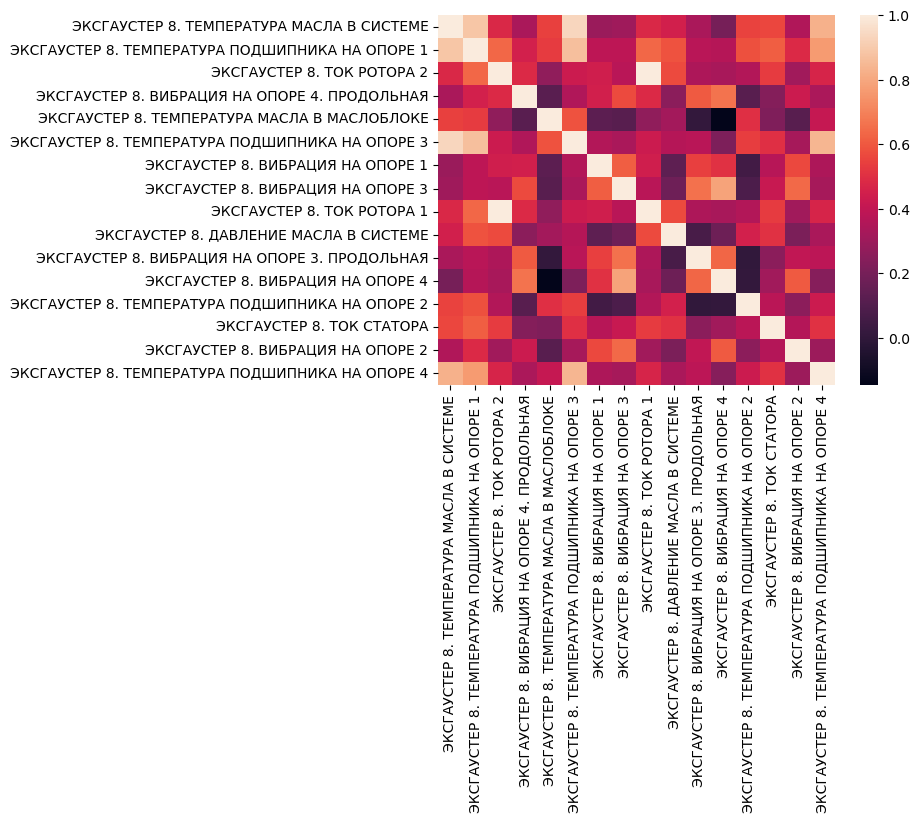

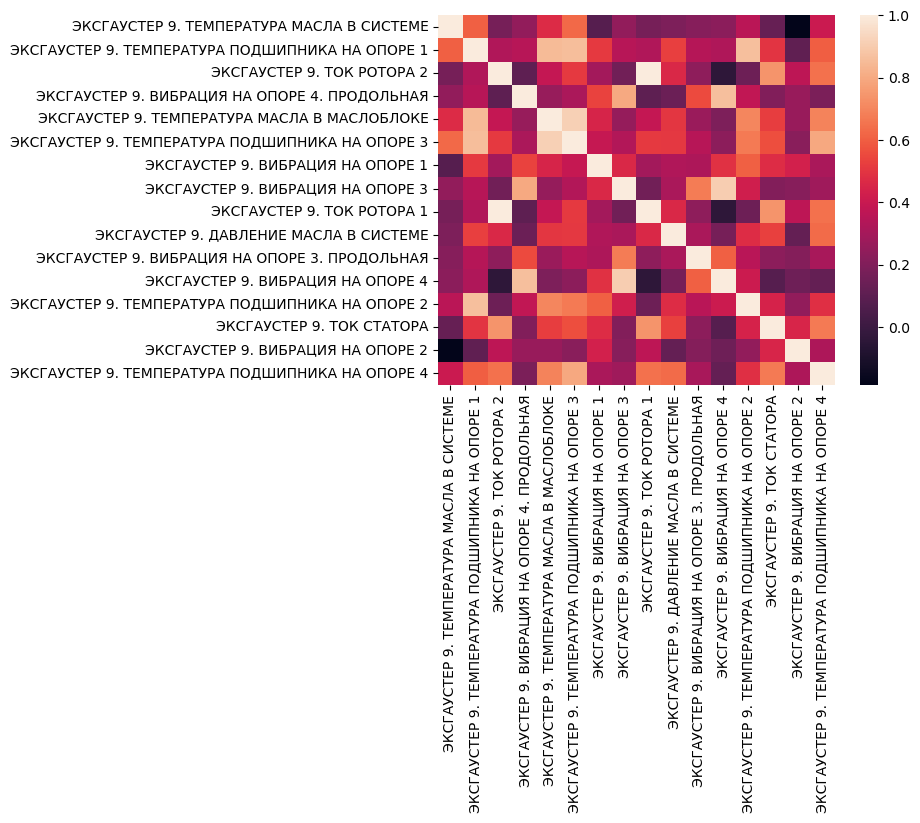

In [16]:
for col in matrix.columns:
    local_columns = []
    for line in matrix.index.values:
        local_columns.append(col+". "+line)
    #X_train[local_columns].plot()
    #plt.show()
    X_train[local_columns].to_csv(col+".csv")
    sns.heatmap(X_train[local_columns].corr())
    plt.show()

ЭКСГАУСТЕР 4. ТОК РОТОРА 1
[<class 'float'>]
ЭКСГАУСТЕР 4. ТОК РОТОРА 2
[<class 'float'>]
ЭКСГАУСТЕР 4. ТОК СТАТОРА
[<class 'float'>]
ЭКСГАУСТЕР 4. ДАВЛЕНИЕ МАСЛА В СИСТЕМЕ
[<class 'float'>]
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 1
[<class 'float'>]
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 2
[<class 'float'>]
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 3
[<class 'float'>]
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА ПОДШИПНИКА НА ОПОРЕ 4
[<class 'float'>]
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В СИСТЕМЕ
[<class 'float'>]
ЭКСГАУСТЕР 4. ТЕМПЕРАТУРА МАСЛА В МАСЛОБЛОКЕ
[<class 'float'>]
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 1
[<class 'float'>]
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 2
[<class 'float'>]
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 3
[<class 'float'>]
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 3. ПРОДОЛЬНАЯ
[<class 'float'>]
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 4
[<class 'float'>]
ЭКСГАУСТЕР 4. ВИБРАЦИЯ НА ОПОРЕ 4. ПРОДОЛЬНАЯ
[<class 'float'>]
ЭКСГАУСТЕР 5. ТОК РОТОРА 1
[<class 'float'>]
ЭКСГАУСТЕР 5. ТОК РОТОРА 2
[<class 'float

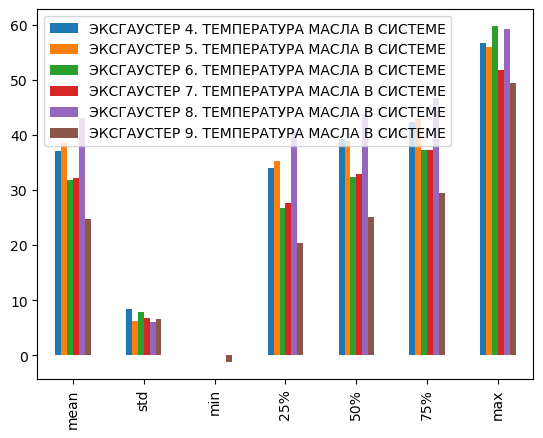

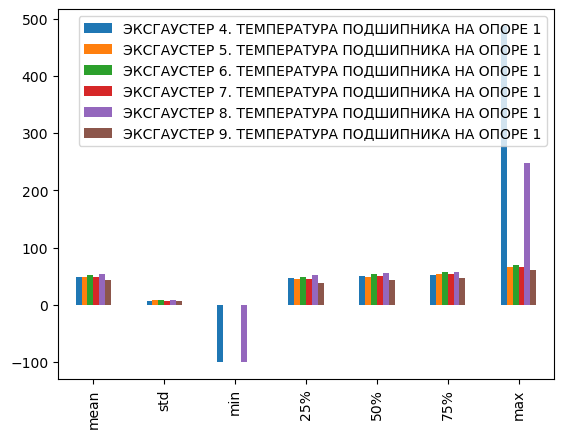

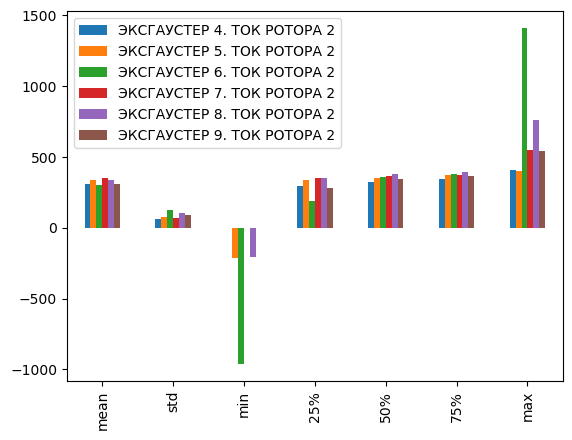

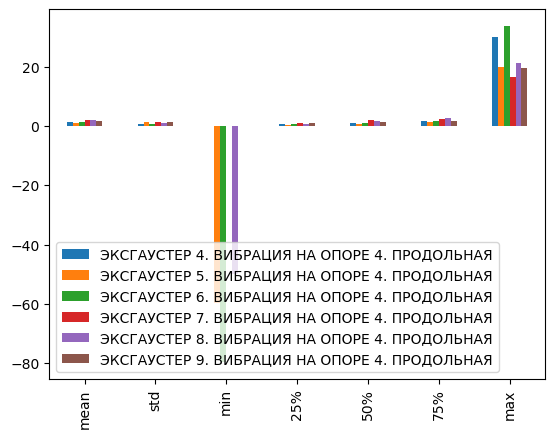

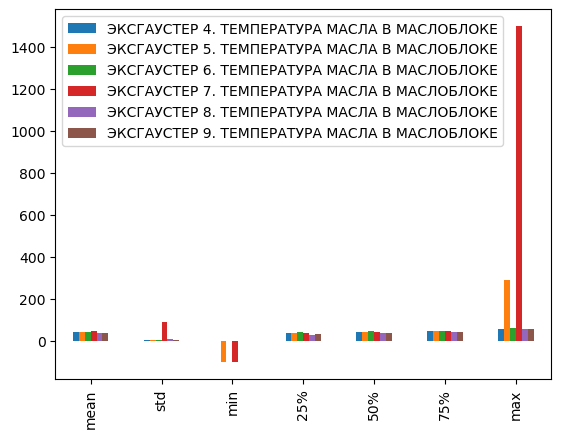

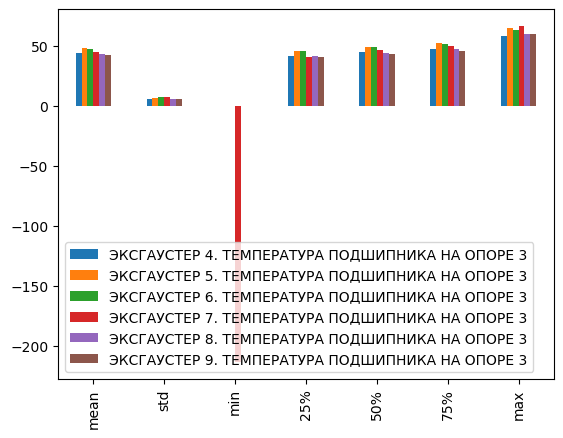

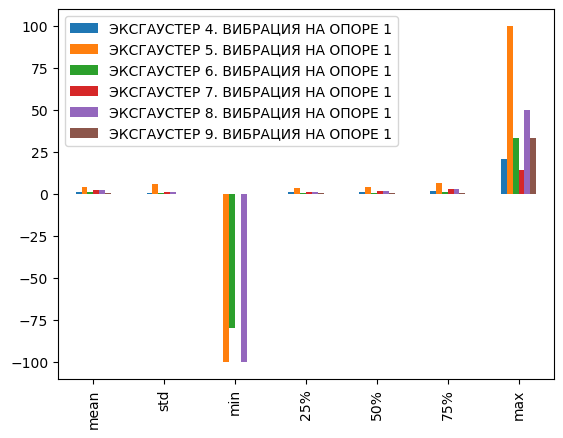

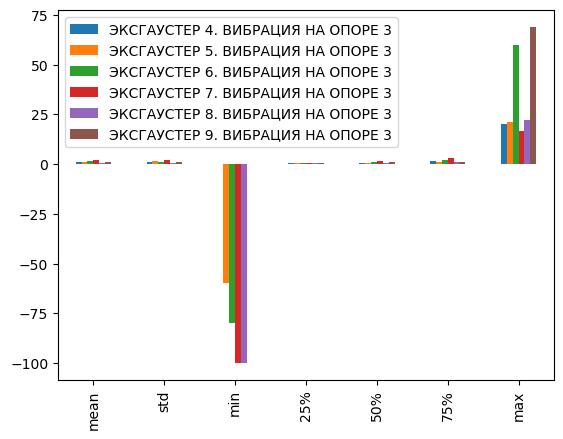

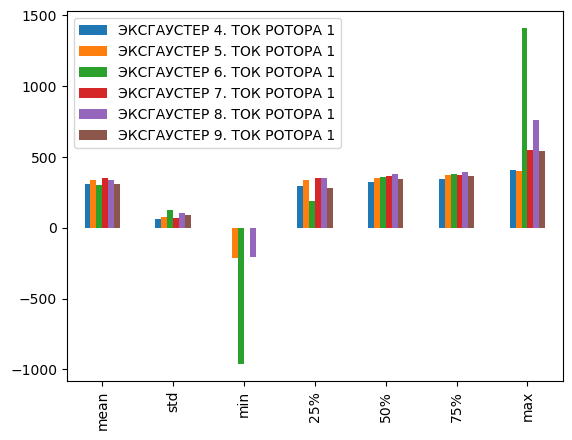

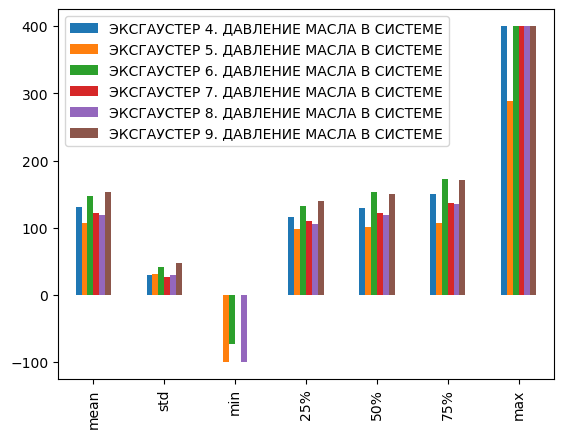

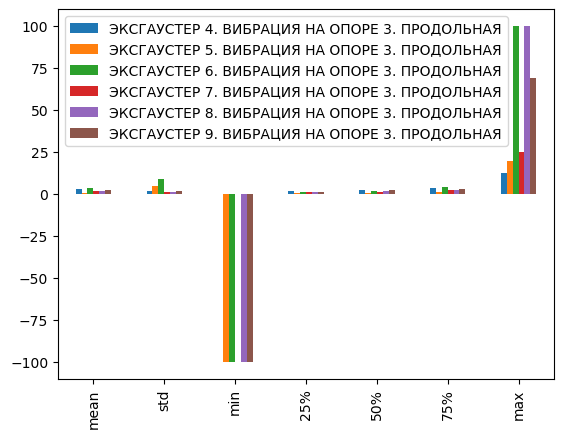

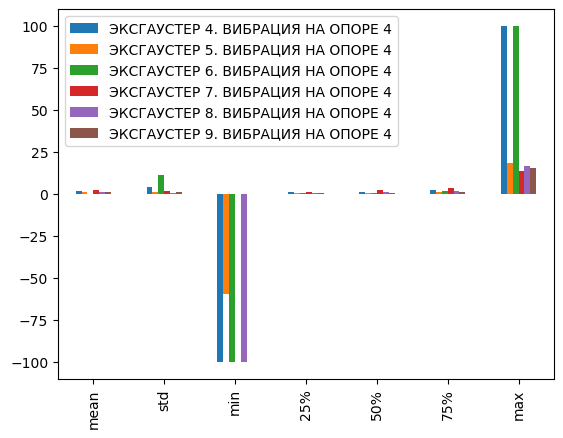

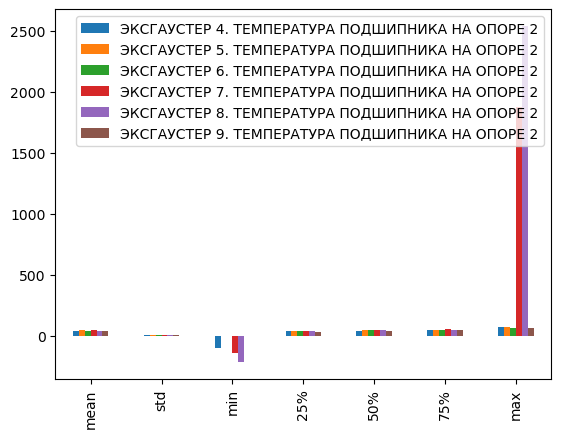

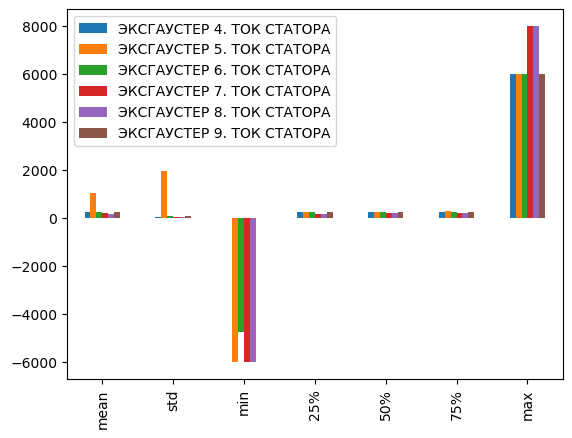

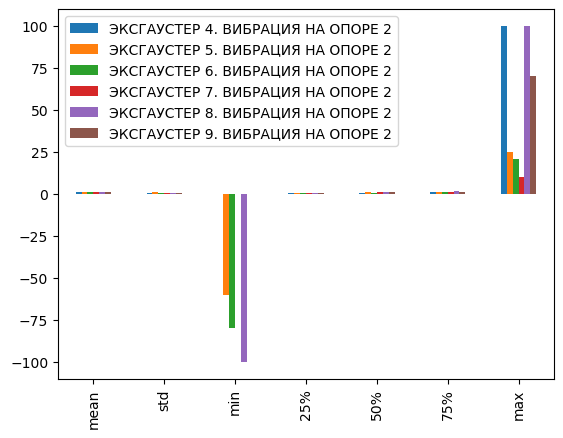

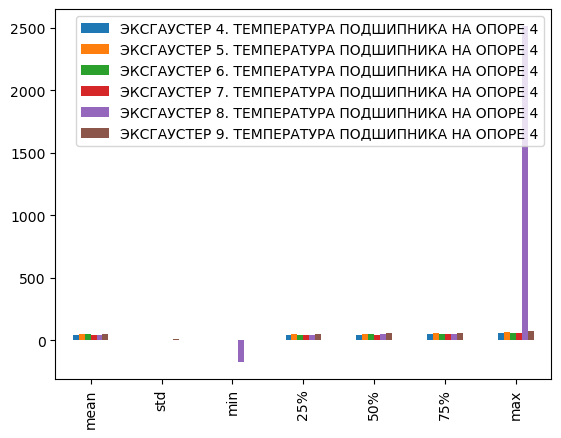

In [17]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
new_df = pd.DataFrame()
for col in X_train.columns:
    print(col)
    print(X_train[col].apply(type).unique())
    new_df = pd.concat([new_df, X_train[col].describe()],axis=1)
new_df = new_df.iloc[1:]
for line in matrix.index.values:
    local_columns = []
    for col in matrix.columns:
        local_columns.append(col+". "+line)
    new_df[local_columns].plot.bar()
    plt.show()

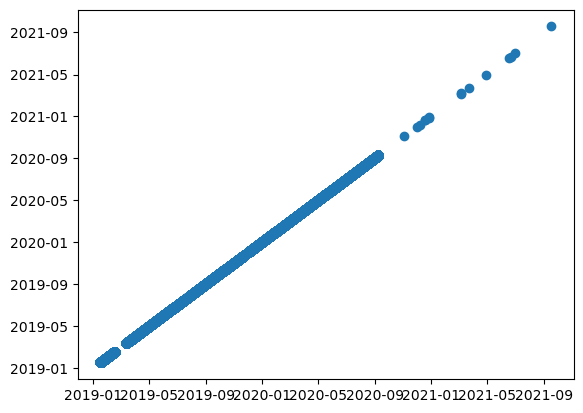

In [18]:
plt.scatter(X_train.index.values, X_train.index.values)
plt.show()